# 1. Think of question

No code for this one!

# 2. Obtain data

(I just grabbed a training-wheels dataset from Kaggle for simplicity:
[the Titanic Survival dataset](https://www.kaggle.com/c/titanic).)

Maybe we can talk about obtaining data more in a later session.

# 3 & 4. Explore data and clean

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
titanic_data = pd.read_csv('titanic_train.csv')

In [4]:
titanic_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can already see some possible issues, even in the first 10 rows:
* There are columns which are (most likely) unique to each passenger, and so useless or even
  confusing to our classifier, like `PassengerId`, `Name`, and `Ticket`.
* There are missing values in both the `Age` and `Cabin` columns, represented by the value `NaN`
  (for "Not a Number", a term inherited from the IEEE floating-point number standard).
* Some discrete-valued columns have already been transformed into numerical values (`Survived`, `Pclass`),
  but others have not (`Sex`, `Embarked`).

### Cleaning, step 1: drop columns unique to passengers

In [5]:
titanic_data.drop(labels=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

`drop()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html))
removes rows or columns from a DataFrame (performing the removal in-place here,
rather than returning a copy with the specified labels dropped). `axis=1` indicates that
the labels we're providing are columns, rather than rows.

It's possible that we could extract some useful information for a classifier from
the `Name` field, but we won't try today.

In [6]:
titanic_data.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


### Cleaning, step 2: handle missing values

First let's see how widespread this problem is.

([`DataFrame.isna()` documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html),
[`DataFrame.sum()` documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html))

In [7]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Seems like a lot! What proportion is that?

In [8]:
titanic_data.isna().sum() / len(titanic_data)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Nearly 20% of passengers don't have an age listed. This could be an issue, but
throwing away data - either those passengers, or age altogether - seems like
a bad idea if we can avoid it.

Nearly 80% of passengers lack cabin information, which is much more troublesome.
We're probably better off just deleting that column entirely.

As for the 2 passengers lacking information on where they embarked, that's probably
easy to solve.

#### Cleaning, step 3(a): replace missing age data with the median age

We could try to be clever and match passengers without an age to similar passengers based
on other columns, but let's just do the easy thing right now.

In [9]:
titanic_data['Age'].fillna(value=titanic_data['Age'].median(), inplace=True)

([`DataFrame.fillna` documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.fillna.html))

#### Cleaning, step 3(b): remove `Cabin` entirely

In [10]:
titanic_data.drop(labels='Cabin', axis=1, inplace=True)

#### Cleaning, step 3(c): replace the missing `Embarked` data with the most common value

In [11]:
titanic_data['Embarked'].fillna(value=titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
titanic_data.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### Cleaning, step 3: transform categorical variables into numbers

We could use the `LabelEncoder` class from the `sklearn.prepocessing` module, but the
task we have before us is so simple that we'll just do it by hand.

`Sex` is easy - we'll transform it into a boolean.

(In general we might need more than two categories, but in this dataset a boolean
suffices.)

In [14]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
titanic_data['Sex'] = (titanic_data['Sex'] == 'female')

`Embarked` will require slightly more work - we generate a dictionary and map that way.

(This is basically how the `LabelEncoder` I mentioned above works under the hood.)

In [16]:
embarked_mapper = {label: idx for idx, label in enumerate(titanic_data['Embarked'].unique())}

In [17]:
embarked_mapper

{'S': 0, 'C': 1, 'Q': 2}

In [18]:
titanic_data['Embarked'] = titanic_data['Embarked'].apply(embarked_mapper.get)

([`DataFrame.apply()` documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html))

In [19]:
titanic_data.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,False,22.0,1,0,7.2500,0
1,1,1,True,38.0,1,0,71.2833,1
2,1,3,True,26.0,0,0,7.9250,0
3,1,1,True,35.0,1,0,53.1000,0
4,0,3,False,35.0,0,0,8.0500,0
5,0,3,False,28.0,0,0,8.4583,2
6,0,1,False,54.0,0,0,51.8625,0
7,0,3,False,2.0,3,1,21.0750,0
8,1,3,True,27.0,0,2,11.1333,0
9,1,2,True,14.0,1,0,30.0708,1


Looking good! Harder to read for a human, but much easier for a classifier.

Keep in mind that the decisions we had to make regarding missing data, and what
to remove, could have consequences for our model performance. In a real project,
we'd probably compare a couple of different solutions to be sure we're making
a good choice.

In a more complex project, we'd probably be doing more data visualization before
diving in, but this is a pretty simple dataset.

# 5. Select a method / model to answer question

We're going to use a decision tree classifier, because they're simple and neat.

(`sklearn` is the module name for `scikit-learn`.)

In [20]:
from sklearn.tree import DecisionTreeClassifier

[Documentation for this model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# 6. Select a metric to score performance

We're going to use the simplest possible metric - the raw accuracy score.

$$accuracy(actual, predicted) = \frac{\text{# labels correct}}{\text{total # labels}}$$

In [21]:
from sklearn.metrics import accuracy_score

[Documentation for this function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

# 7. Split data according to cross-validation scheme

We're again choosing the simplest option - the holdout method.

In [22]:
from sklearn.model_selection import train_test_split

[Documentation for this function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

We have to split off the variable we're hoping to predict first.

In [23]:
full_survived = titanic_data['Survived']
full_predictors = titanic_data.drop(labels='Survived', axis=1)

In [24]:
TEST_SPLIT = 0.2 # 20% of data

In [25]:
(train_predictors,
 test_predictors,
 train_survived,
 test_survived) = train_test_split(full_predictors,
                                   full_survived,
                                   test_size=TEST_SPLIT)

# 8. Train model on data

In [26]:
dtree_model_default = DecisionTreeClassifier() # using default (hyper)parameters

In [27]:
dtree_model_default.fit(train_predictors, train_survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 9. Score model performance

In [28]:
test_survived_predicted = dtree_model_default.predict(test_predictors)

In [29]:
print('accuracy when using our decision tree: {:.3f}'.format(accuracy_score(test_survived, test_survived_predicted)))

accuracy when using our decision tree: 0.760


Ok, a bit less than 80%. Is that good? How do we tell?

Well, the output variable is boolean (survived or not), so at least we've
done better than someone just flipping a coin.

But if the two classes aren't evenly spread in our dataset, we could get
better-than-chance performance simply by predicting that the likelier outcome
befell everyone.

In [30]:
print('accuracy when predicting no survival: {:.3f}'.format(1 - test_survived.sum() / len(test_survived)))

accuracy when predicting no survival: 0.631


Hmm! Just by claiming that everyone died, we could top 60% correct.

(Note that our dataset isn't quite representative of the historical data - 
roughly 68% of the people on board died.)

But at about 80%, we're still doing better than this dumb predictor.

There's one more dirt-simple predictor. The sinking of the
Titanic is partially responsible for the prevalence of the "women and children
first" idea in popular culture - 75% of the women on board survived,
while only 20% of the men did. So let's see what happens if we predict that
only women survive.

(Note that this precise gender imbalance in survival doesn't appear in most other
historical shipwrecks - men are usually more likely to survive, in fact. See
[this paper in PNAS](http://www.pnas.org/content/early/2012/07/23/1207156109.short).)

In [31]:
# remember that we mapped 'female' to True and 'male' to False
print('accuracy when predicting only women survive: {:.3f}'.format(accuracy_score(test_survived, test_predictors['Sex'] == True)))

accuracy when predicting only women survive: 0.816


Dang! Just by predicting that only women survive, we can match or beat
our decision tree.

# 10. Revisit prior steps as necessary

### 10(a): our cross-validation is poor

We described four models above:

1. Chance: flip a coin for each passenger to see whether they survived.
2. Most prevalent: predict the most likely outcome in the dataset ("did not survive") for every passenger.
3. Hand-selected decision (based on prior knowledge or intuition): predict that only women survived.
4. Our machine learning model: decision tree trained on 80% of the data.

We then compared their performance on the 20% of the original data we held aside for testing.

If we use this process to decide which prediction model to use, we run into a problem.
Our "total model" now has an additional level of abstraction: it can be described as "whichever model
from the list above that did best on our testing dataset." But this "total model" has folded
information from our test data into itself - that's how we decided which of the four to use.

We can no longer be certain our "total model" will perform this well on a further test dataset.

Just as we can describe our problem as one of nested models, our solution lies in nesting
our train-test split, with the portion of the old training set laid aside for model
comparison now called the "validation" set:

![train-test-validate](train_test_validate_50pct.png)

([image source](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7))

So we train our model (model 4 above, as models 1-3 don't need training) on the set
labeled "train." We then compare models using the "validation" set, and our final reported
prediction score would be generated using the "test" set.

#### 10(a), re-doing step 7: cross-validation split

The simplest way to do this is just to call `train_test_split()` again on the training set.

In [32]:
VALIDATION_SPLIT = 0.2

In [33]:
(train_predictors_2ndpass,
 validation_predictors,
 train_survived_2ndpass,
 validation_survived) = train_test_split(train_predictors,
                                         train_survived,
                                         test_size=VALIDATION_SPLIT)

#### 10(a), re-doing step 8: train the model on data

In [34]:
dtree_model_cv_default = DecisionTreeClassifier() # using default (hyper)parameters again

In [35]:
dtree_model_cv_default.fit(train_predictors_2ndpass, train_survived_2ndpass)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 10(a), re-doing step 9: evaluate model performance

In [36]:
validation_survived_predicted = dtree_model_cv_default.predict(validation_predictors)

In [37]:
print('accuracy when using our decision tree (validation set): {:.3f}'.format(accuracy_score(validation_survived, validation_survived_predicted)))

accuracy when using our decision tree (validation set): 0.783


In [38]:
print('accuracy when predicting no survival (validation set): {:.3f}'.format(1 - validation_survived.sum() / len(validation_survived)))

accuracy when predicting no survival (validation set): 0.615


In [39]:
print('accuracy when predicting only women survive (validation set): {:.3f}'.format(accuracy_score(validation_survived, validation_predictors['Sex'] == True)))

accuracy when predicting only women survive (validation set): 0.853


So each of our "models" is still performing in the same ballpark.

If we pick our decision tree, how does it do on the test data?

In [40]:
test_survived_predicted_cv = dtree_model_cv_default.predict(test_predictors)

In [41]:
print('accuracy when using our decision tree (test set): {:.3f}'.format(accuracy_score(test_survived, test_survived_predicted_cv)))

accuracy when using our decision tree (test set): 0.715


So we haven't really affected our numbers (even though we're training the
decision tree on 20% less data).

But we **can** be more confident now that our chosen model will perform as
advertised on data it's never seen.

#### 10(a) final note

We're still not doing cross-validation fully correctly, because the holdout
method that we're using to generate the train/test/validation sets could be selecting
biased samples, and thus we might be overfitting to those.

The really **right** way to do this would be to use actual folded cross-validation, where
you average performance on all folds is what you use to determine which model to run on
the test set. (Check out [the documentation for `sklearn`'s cross validation procedures](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and try it for yourself.)

(Of course, as with seemingly so many things in this field, there are those who disagree -
some people prefer rigorous bootstrapping to split-sample cross-validation, and they might
be right. We definitely don't have time to go into this today.)

### 10(b): we want to tweak the model's hyperparameters

Decision trees have a tendency to overfit, and this may be part of why we're not
performing better on the validation and test sets.

There are a number of parameters used to determine how a decision tree is fit.

We'll try fiddling with the `min_samples_split` parameter.

At each branch point of a decision tree, there is a certain pool of samples remaining,
and the fitting algorithm tries to use a feature in the predictors to segregate them
according to the outcome variable. One of the ways that decision trees can overfit is
by continuing to split until each decision produces pools with only a small number of
samples in them.

#### 10(b), re-doing step 8: train the model on data

The default value for `min_samples_split` is 2, which is pretty small. Let's try a
few larger values, and compare their performance on the validation set.

In [42]:
mss_values = [2, 5, 10, 20, 50, 75, 100]

In [43]:
dtree_models_cv_mss_tuning = {mss: DecisionTreeClassifier(min_samples_split=mss) for mss in mss_values}

In [44]:
for dtc in dtree_models_cv_mss_tuning.values():
    dtc.fit(train_predictors_2ndpass, train_survived_2ndpass)

#### 10(b), re-doing step 9: evaluate model performance

In [45]:
outcomes = []
for mss, dtc in dtree_models_cv_mss_tuning.items():
    outcomes.append(accuracy_score(validation_survived, dtc.predict(validation_predictors)))
    print('accuracy using decision tree with mss of {} (validation set): {:.3f}'.format(mss, outcomes[-1]))

accuracy using decision tree with mss of 2 (validation set): 0.776
accuracy using decision tree with mss of 5 (validation set): 0.804
accuracy using decision tree with mss of 10 (validation set): 0.804
accuracy using decision tree with mss of 20 (validation set): 0.811
accuracy using decision tree with mss of 50 (validation set): 0.825
accuracy using decision tree with mss of 75 (validation set): 0.853
accuracy using decision tree with mss of 100 (validation set): 0.776


Plotting these results, we see:

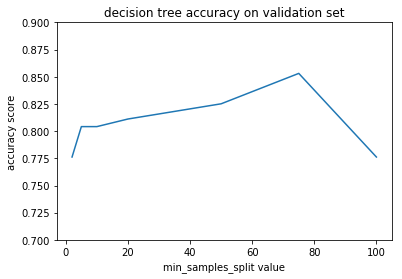

In [46]:
plt.plot(dtree_models_cv_mss_tuning.keys(), outcomes)
plt.ylim(0.7, 0.9)
plt.xlabel('min_samples_split value')
plt.ylabel('accuracy score')
plt.title('decision tree accuracy on validation set');

And running the best model on the test set:

In [47]:
best_outcome = max(outcomes)
best_mss = mss_values[outcomes.index(best_outcome)]
best_dtc = dtree_models_cv_mss_tuning[best_mss]
print('accuracy when using our best decision tree (mss={}) (test set): {:.3f}'.format(best_mss,
                                                                                        accuracy_score(test_survived,
                                                                                        best_dtc.predict(test_predictors))))

accuracy when using our best decision tree (mss=75) (test set): 0.832


Some improvement (hopefully). Not superb - further work could probably bring us higher,
but this is OK for now.

### 10(c): we'd like to use a different metric to score the model

Accuracy is simple and easy to interpret, but isn't appropriate or
useful in many cases. In our case, if the cost (determined by us, our environment,
or our business case) of getting the classification wrong is different
depending on the direction of the error, accuracy won't be as helpful.

We'll try to apply another metric, the [F1 score](https://en.wikipedia.org/wiki/F1_score).
Let's first take a look at the confusion matrix.

| *            | Survived         | Died           | (predicted) |
| ------------ | ---------------- | -------------- | ----------- |
| **Survived** | true positive    | false negative |             |
| **Died**     | false positive   | true negative  |             |
| **(actual)** |                                                 |

The **precision** of a model is the true positives out of the total predicted positives:

$$ precision = \frac{TP}{TP + FP} $$

The **recall** of a model is the true positives out of the total actual positives:

$$ recall = \frac{TP}{TP + FN} $$

And the F1 score is a combination of these values (specifically, the harmonic mean):

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall} $$

Briefly, the F1 score can sometimes detect poor model performance where accuracy might not,
particularly when one label dominates the other in the dataset (i.e., we're trying to
identify interesting things, and most things aren't interesting).

#### 10(c), re-doing step 9: evaluate model performance

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print('F1 score when predicting no survival (validation set): {:.3f}'.format(f1_score(validation_survived,
                                                                                      [False] * len(validation_survived))))

(So if there are no predicted survivals, we can't use the F1 score because its denominator is 0.)

In [ ]:
print('F1 score when predicting only women survive (validation set): {:.3f}'.format(f1_score(validation_survived, validation_predictors['Sex'] == True)))

In [ ]:
outcomes_f1 = []
for mss, dtc in dtree_models_cv_mss_tuning.items():
    outcomes_f1.append(f1_score(validation_survived, dtc.predict(validation_predictors)))
    print('F1 score using decision tree with mss of {} (validation set): {:.3f}'.format(mss, outcomes_f1[-1]))

In [ ]:
best_outcome_f1 = max(outcomes_f1)
best_mss_f1 = mss_values[outcomes_f1.index(best_outcome_f1)]
best_dtc_f1 = dtree_models_cv_mss_tuning[best_mss_f1]
print('F1 score when using our best decision tree (mss={}) (test set): {:.3f}'.format(best_mss_f1,
                                                                                      f1_score(test_survived,
                                                                                      best_dtc_f1.predict(test_predictors))))

Hmm. When evaluating performance using the F1 score, we do worse than the only-women-survive heuristic.